In [1]:
# import data
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
# use label encoder to convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

df

# fill missing data with mean
df.fillna(df.mean(), inplace=True)
df_test.fillna(df_test.mean(), inplace=True)


TypeError: can only concatenate str (not "int") to str

In [ ]:
# splitt data
from sklearn.model_selection import train_test_split
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
# convert df_test to numerical data
for column in df_test.columns:
    if df_test[column].dtype == type(object):
        df_test[column] = le.fit_transform(df_test[column])
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,2,3,3,0,...,120,0,2,2,3,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,2,0,3,0,...,0,0,2,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,2,0,3,0,...,0,0,2,2,3,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,2,0,3,0,...,0,0,2,4,3,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,2,0,1,0,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,4,21.0,1936,1,2,3,3,0,...,0,0,2,4,3,0,6,2006,8,4
1455,2916,160,4,21.0,1894,1,2,3,3,0,...,0,0,2,4,3,0,4,2006,8,0
1456,2917,20,3,160.0,20000,1,2,3,3,0,...,0,0,2,4,3,0,9,2006,8,0
1457,2918,85,3,62.0,10441,1,2,3,3,0,...,0,0,2,2,2,700,7,2006,8,4


<Axes: >

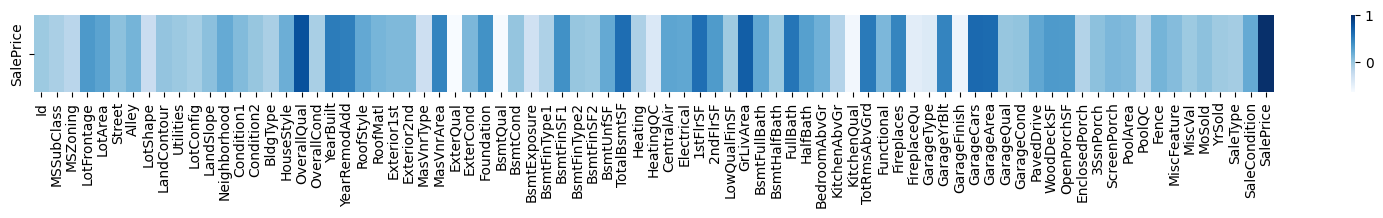

In [ ]:
#1d heatmap to see correlation between saleprice and other features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,1))
sns.heatmap(df.corr().sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')



In [ ]:
# make correlation matrix absolute
corr_matrix = df.corr().abs()
# keep corr over 0.5
corr_features = corr_matrix[corr_matrix > 0.6]

# delete columns with low correlation
df.drop(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

#1d heatmap to see correlation between saleprice and other features
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,1))
sns.heatmap(corr_features.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Blues')

KeyError: "['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'] not found in axis"

In [ ]:
df

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,3,65.0,8450,1,2,3,3,0,4,0,...,0,61,3,4,4,2,2008,8,4,208500
1,3,80.0,9600,1,2,3,3,0,2,0,...,298,0,3,4,4,5,2007,8,4,181500
2,3,68.0,11250,1,2,0,3,0,4,0,...,0,42,3,4,4,9,2008,8,4,223500
3,3,60.0,9550,1,2,0,3,0,0,0,...,0,35,3,4,4,2,2006,8,0,140000
4,3,84.0,14260,1,2,0,3,0,2,0,...,192,84,3,4,4,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,62.0,7917,1,2,3,3,0,4,0,...,0,40,3,4,4,8,2007,8,4,175000
1456,3,85.0,13175,1,2,3,3,0,4,0,...,349,0,3,2,4,2,2010,8,4,210000
1457,3,66.0,9042,1,2,3,3,0,4,0,...,0,60,3,0,2,5,2010,8,4,266500
1458,3,68.0,9717,1,2,3,3,0,4,0,...,366,0,3,4,4,4,2010,8,4,142125


In [ ]:
# split data
from sklearn.model_selection import train_test_split
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# use lr model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(df_test)

y_pred

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- 3SsnPorch
- BsmtFinSF2
- BsmtHalfBath
- EnclosedPorch
- Id
- ...
